In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings(action='ignore')

# Data Understanding

In [2]:
df_cancer = pd.read_csv('cancer_classification.csv')

In [5]:
df_cancer.head()

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension,benign_0__mal_1
0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,0.07871,...,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,0
1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,0.05667,...,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902,0
2,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,0.05999,...,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758,0
3,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,0.09744,...,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300,0
4,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,0.05883,...,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678,0


In [3]:
df_cancer.shape

(569, 31)

In [4]:
df_cancer.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 569 entries, 0 to 568
Data columns (total 31 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   mean radius              569 non-null    float64
 1   mean texture             569 non-null    float64
 2   mean perimeter           569 non-null    float64
 3   mean area                569 non-null    float64
 4   mean smoothness          569 non-null    float64
 5   mean compactness         569 non-null    float64
 6   mean concavity           569 non-null    float64
 7   mean concave points      569 non-null    float64
 8   mean symmetry            569 non-null    float64
 9   mean fractal dimension   569 non-null    float64
 10  radius error             569 non-null    float64
 11  texture error            569 non-null    float64
 12  perimeter error          569 non-null    float64
 13  area error               569 non-null    float64
 14  smoothness error         5

In [6]:
df_cancer.describe()

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension,benign_0__mal_1
count,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,...,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000
mean,14.127292,19.289649,91.969033,654.889104,0.096360,0.104341,0.088799,0.048919,0.181162,0.062798,...,25.677223,107.261213,880.583128,0.132369,0.254265,0.272188,0.114606,0.290076,0.083946,0.627417
std,3.524049,4.301036,24.298981,351.914129,0.014064,0.052813,0.079720,0.038803,0.027414,0.007060,...,6.146258,33.602542,569.356993,0.022832,0.157336,0.208624,0.065732,0.061867,0.018061,0.483918
min,6.981000,9.710000,43.790000,143.500000,0.052630,0.019380,0.000000,0.000000,0.106000,0.049960,...,12.020000,50.410000,185.200000,0.071170,0.027290,0.000000,0.000000,0.156500,0.055040,0.000000
25%,11.700000,16.170000,75.170000,420.300000,0.086370,0.064920,0.029560,0.020310,0.161900,0.057700,...,21.080000,84.110000,515.300000,0.116600,0.147200,0.114500,0.064930,0.250400,0.071460,0.000000
50%,13.370000,18.840000,86.240000,551.100000,0.095870,0.092630,0.061540,0.033500,0.179200,0.061540,...,25.410000,97.660000,686.500000,0.131300,0.211900,0.226700,0.099930,0.282200,0.080040,1.000000
75%,15.780000,21.800000,104.100000,782.700000,0.105300,0.130400,0.130700,0.074000,0.195700,0.066120,...,29.720000,125.400000,1084.000000,0.146000,0.339100,0.382900,0.161400,0.317900,0.092080,1.000000
max,28.110000,39.280000,188.500000,2501.000000,0.163400,0.345400,0.426800,0.201200,0.304000,0.097440,...,49.540000,251.200000,4254.000000,0.222600,1.058000,1.252000,0.291000,0.663800,0.207500,1.000000


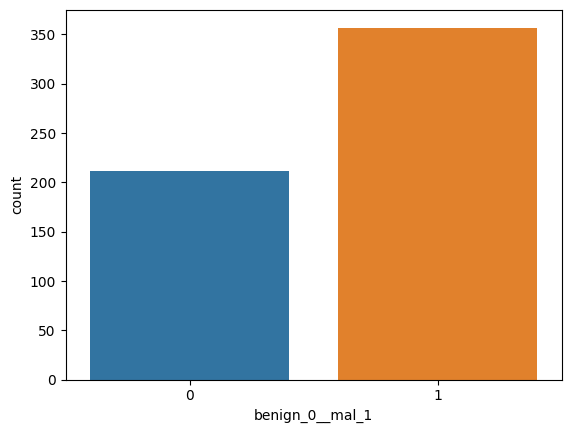

In [8]:
sns.countplot(data=df_cancer,x='benign_0__mal_1');

In [9]:
df_cancer.corr()

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension,benign_0__mal_1
mean radius,1.000000,0.323782,0.997855,0.987357,0.170581,0.506124,0.676764,0.822529,0.147741,-0.311631,...,0.297008,0.965137,0.941082,0.119616,0.413463,0.526911,0.744214,0.163953,0.007066,-0.730029
mean texture,0.323782,1.000000,0.329533,0.321086,-0.023389,0.236702,0.302418,0.293464,0.071401,-0.076437,...,0.912045,0.358040,0.343546,0.077503,0.277830,0.301025,0.295316,0.105008,0.119205,-0.415185
mean perimeter,0.997855,0.329533,1.000000,0.986507,0.207278,0.556936,0.716136,0.850977,0.183027,-0.261477,...,0.303038,0.970387,0.941550,0.150549,0.455774,0.563879,0.771241,0.189115,0.051019,-0.742636
mean area,0.987357,0.321086,0.986507,1.000000,0.177028,0.498502,0.685983,0.823269,0.151293,-0.283110,...,0.287489,0.959120,0.959213,0.123523,0.390410,0.512606,0.722017,0.143570,0.003738,-0.708984
mean smoothness,0.170581,-0.023389,0.207278,0.177028,1.000000,0.659123,0.521984,0.553695,0.557775,0.584792,...,0.036072,0.238853,0.206718,0.805324,0.472468,0.434926,0.503053,0.394309,0.499316,-0.358560
mean compactness,0.506124,0.236702,0.556936,0.498502,0.659123,1.000000,0.883121,0.831135,0.602641,0.565369,...,0.248133,0.590210,0.509604,0.565541,0.865809,0.816275,0.815573,0.510223,0.687382,-0.596534
mean concavity,0.676764,0.302418,0.716136,0.685983,0.521984,0.883121,1.000000,0.921391,0.500667,0.336783,...,0.299879,0.729565,0.675987,0.448822,0.754968,0.884103,0.861323,0.409464,0.514930,-0.696360
mean concave points,0.822529,0.293464,0.850977,0.823269,0.553695,0.831135,0.921391,1.000000,0.462497,0.166917,...,0.292752,0.855923,0.809630,0.452753,0.667454,0.752399,0.910155,0.375744,0.368661,-0.776614
mean symmetry,0.147741,0.071401,0.183027,0.151293,0.557775,0.602641,0.500667,0.462497,1.000000,0.479921,...,0.090651,0.219169,0.177193,0.426675,0.473200,0.433721,0.430297,0.699826,0.438413,-0.330499
mean fractal dimension,-0.311631,-0.076437,-0.261477,-0.283110,0.584792,0.565369,0.336783,0.166917,0.479921,1.000000,...,-0.051269,-0.205151,-0.231854,0.504942,0.458798,0.346234,0.175325,0.334019,0.767297,0.012838


# Data Visualization

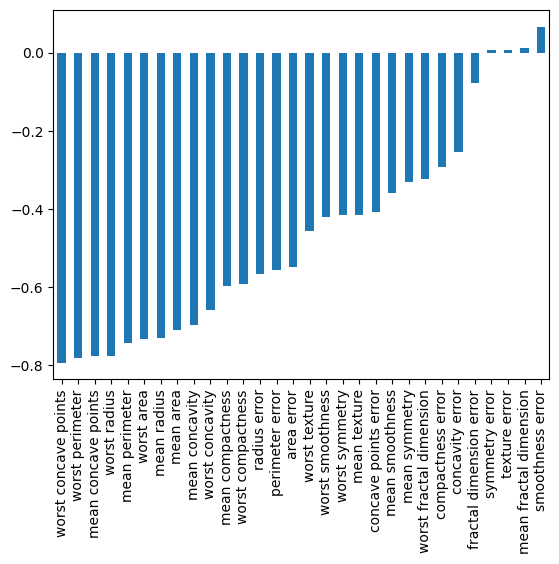

In [13]:
df_cancer.corr()['benign_0__mal_1'][:-1].sort_values().plot(kind='bar');

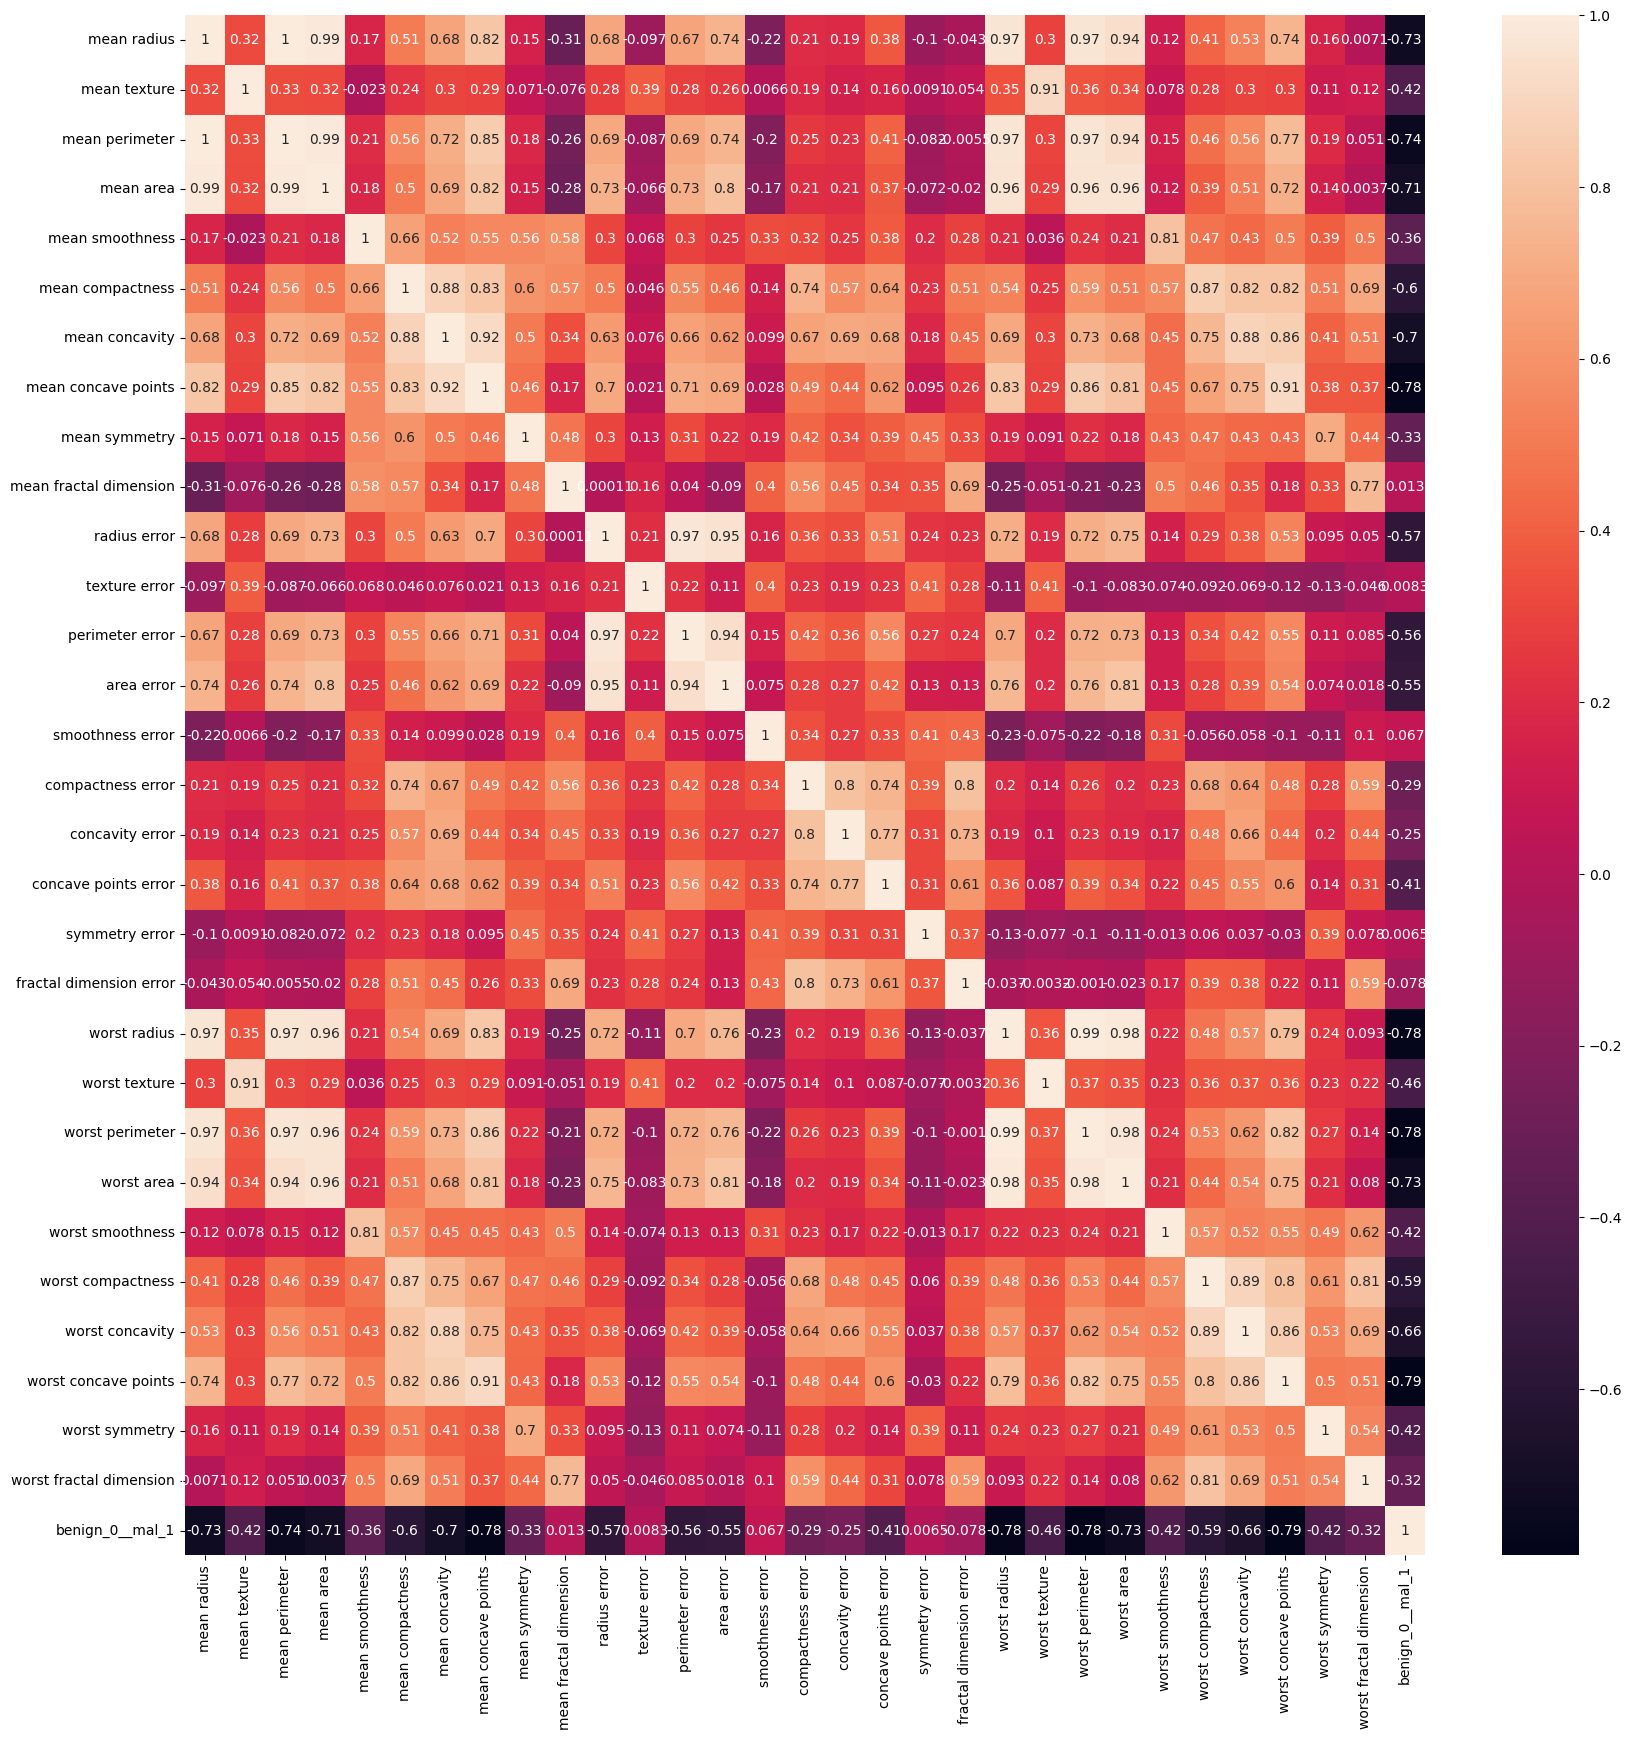

In [18]:
plt.figure(figsize=(20,20))
sns.heatmap(df_cancer.corr(),annot=True);

# Data Preprocessing

In [19]:
X = df_cancer.drop('benign_0__mal_1',axis=1)
y = df_cancer['benign_0__mal_1']

In [20]:
from sklearn.model_selection import train_test_split

In [22]:
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.25,random_state=101)

In [23]:
from sklearn.preprocessing import MinMaxScaler

In [24]:
scaler = MinMaxScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# Model Building

In [25]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense,Dropout

In [29]:
model = Sequential()
model.add(Dense(30,activation='relu'))
model.add(Dense(15,activation='relu'))
model.add(Dense(1,activation='sigmoid'))
model.compile(loss='binary_crossentropy',optimizer='adam')

In [30]:
model.fit(X_train,y_train,epochs=600,validation_data=(X_test,y_test))

Epoch 1/600
14/14 [==============================] - 1s 10ms/step - loss: 0.6792 - val_loss: 0.6595
Epoch 2/600
14/14 [==============================] - 0s 2ms/step - loss: 0.6502 - val_loss: 0.6288
Epoch 3/600
14/14 [==============================] - 0s 2ms/step - loss: 0.6147 - val_loss: 0.5920
Epoch 4/600
14/14 [==============================] - 0s 2ms/step - loss: 0.5740 - val_loss: 0.5483
Epoch 5/600
14/14 [==============================] - 0s 2ms/step - loss: 0.5299 - val_loss: 0.5013
Epoch 6/600
14/14 [==============================] - 0s 2ms/step - loss: 0.4826 - val_loss: 0.4505
Epoch 7/600
14/14 [==============================] - 0s 2ms/step - loss: 0.4330 - val_loss: 0.4009
Epoch 8/600
14/14 [==============================] - 0s 2ms/step - loss: 0.3876 - val_loss: 0.3547
Epoch 9/600
14/14 [==============================] - 0s 2ms/step - loss: 0.3476 - val_loss: 0.3176
Epoch 10/600
14/14 [==============================] - 0s 2ms/step - loss: 0.3163 - val_loss: 0.2861
Epoch 11

14/14 [==============================] - 0s 2ms/step - loss: 0.0540 - val_loss: 0.1131
Epoch 84/600
14/14 [==============================] - 0s 2ms/step - loss: 0.0556 - val_loss: 0.1111
Epoch 85/600
14/14 [==============================] - 0s 2ms/step - loss: 0.0532 - val_loss: 0.1095
Epoch 86/600
14/14 [==============================] - 0s 2ms/step - loss: 0.0533 - val_loss: 0.1087
Epoch 87/600
14/14 [==============================] - 0s 2ms/step - loss: 0.0520 - val_loss: 0.1131
Epoch 88/600
14/14 [==============================] - 0s 2ms/step - loss: 0.0583 - val_loss: 0.1085
Epoch 89/600
14/14 [==============================] - 0s 2ms/step - loss: 0.0598 - val_loss: 0.1102
Epoch 90/600
14/14 [==============================] - 0s 2ms/step - loss: 0.0523 - val_loss: 0.1197
Epoch 91/600
14/14 [==============================] - 0s 2ms/step - loss: 0.0490 - val_loss: 0.1104
Epoch 92/600
14/14 [==============================] - 0s 2ms/step - loss: 0.0501 - val_loss: 0.1180
Epoch 93/600


14/14 [==============================] - 0s 2ms/step - loss: 0.0332 - val_loss: 0.1518
Epoch 246/600
14/14 [==============================] - 0s 2ms/step - loss: 0.0346 - val_loss: 0.1509
Epoch 247/600
14/14 [==============================] - 0s 2ms/step - loss: 0.0324 - val_loss: 0.1735
Epoch 248/600
14/14 [==============================] - 0s 2ms/step - loss: 0.0351 - val_loss: 0.1583
Epoch 249/600
14/14 [==============================] - 0s 2ms/step - loss: 0.0317 - val_loss: 0.1434
Epoch 250/600
14/14 [==============================] - 0s 2ms/step - loss: 0.0334 - val_loss: 0.1504
Epoch 251/600
14/14 [==============================] - 0s 2ms/step - loss: 0.0320 - val_loss: 0.1525
Epoch 252/600
14/14 [==============================] - 0s 2ms/step - loss: 0.0337 - val_loss: 0.1593
Epoch 253/600
14/14 [==============================] - 0s 2ms/step - loss: 0.0344 - val_loss: 0.1539
Epoch 254/600
14/14 [==============================] - 0s 2ms/step - loss: 0.0312 - val_loss: 0.1546
Epoc

14/14 [==============================] - 0s 2ms/step - loss: 0.0221 - val_loss: 0.1782
Epoch 408/600
14/14 [==============================] - 0s 2ms/step - loss: 0.0211 - val_loss: 0.1858
Epoch 409/600
14/14 [==============================] - 0s 2ms/step - loss: 0.0214 - val_loss: 0.1832
Epoch 410/600
14/14 [==============================] - 0s 2ms/step - loss: 0.0217 - val_loss: 0.1802
Epoch 411/600
14/14 [==============================] - 0s 2ms/step - loss: 0.0216 - val_loss: 0.1809
Epoch 412/600
14/14 [==============================] - 0s 2ms/step - loss: 0.0229 - val_loss: 0.1835
Epoch 413/600
14/14 [==============================] - 0s 2ms/step - loss: 0.0213 - val_loss: 0.1816
Epoch 414/600
14/14 [==============================] - 0s 2ms/step - loss: 0.0218 - val_loss: 0.1668
Epoch 415/600
14/14 [==============================] - 0s 2ms/step - loss: 0.0238 - val_loss: 0.1791
Epoch 416/600
14/14 [==============================] - 0s 2ms/step - loss: 0.0281 - val_loss: 0.1815
Epoc

14/14 [==============================] - 0s 2ms/step - loss: 0.0190 - val_loss: 0.2127
Epoch 570/600
14/14 [==============================] - 0s 2ms/step - loss: 0.0158 - val_loss: 0.2216
Epoch 571/600
14/14 [==============================] - 0s 2ms/step - loss: 0.0135 - val_loss: 0.2190
Epoch 572/600
14/14 [==============================] - 0s 2ms/step - loss: 0.0139 - val_loss: 0.2250
Epoch 573/600
14/14 [==============================] - 0s 2ms/step - loss: 0.0135 - val_loss: 0.2303
Epoch 574/600
14/14 [==============================] - 0s 2ms/step - loss: 0.0139 - val_loss: 0.2269
Epoch 575/600
14/14 [==============================] - 0s 2ms/step - loss: 0.0128 - val_loss: 0.2211
Epoch 576/600
14/14 [==============================] - 0s 2ms/step - loss: 0.0131 - val_loss: 0.2265
Epoch 577/600
14/14 [==============================] - 0s 2ms/step - loss: 0.0130 - val_loss: 0.2167
Epoch 578/600
14/14 [==============================] - 0s 2ms/step - loss: 0.0135 - val_loss: 0.2345
Epoc

In [31]:
losses = pd.DataFrame(model.history.history)

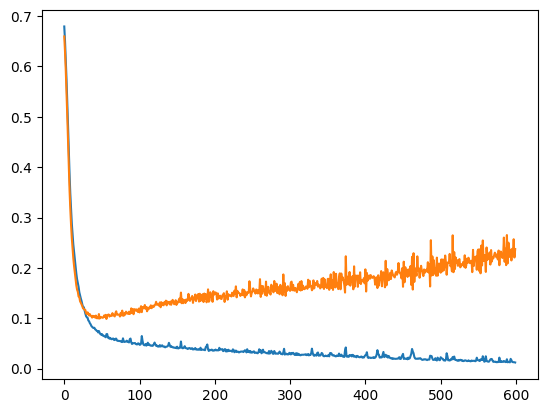

In [33]:
plt.plot(losses);

In [ ]:
# Model is overfitting so we will apply regularization usingEarlyStopping

In [34]:
model = Sequential()
model.add(Dense(30,activation='relu'))
model.add(Dense(15,activation='relu'))
model.add(Dense(1,activation='sigmoid'))
model.compile(loss='binary_crossentropy',optimizer='adam')

# Regularization

## EarlyStopping

In [35]:
from tensorflow.keras.callbacks import EarlyStopping

In [37]:
early_stop =  EarlyStopping(monitor='val_loss',mode='min',verbose=1,patience=25)

In [38]:
model.fit(X_train,y_train,epochs=600,validation_data=(X_test,y_test),callbacks=[early_stop])

Epoch 1/600
14/14 [==============================] - 0s 7ms/step - loss: 0.6761 - val_loss: 0.6420
Epoch 2/600
14/14 [==============================] - 0s 2ms/step - loss: 0.6252 - val_loss: 0.5981
Epoch 3/600
14/14 [==============================] - 0s 2ms/step - loss: 0.5745 - val_loss: 0.5441
Epoch 4/600
14/14 [==============================] - 0s 2ms/step - loss: 0.5209 - val_loss: 0.4872
Epoch 5/600
14/14 [==============================] - 0s 2ms/step - loss: 0.4673 - val_loss: 0.4335
Epoch 6/600
14/14 [==============================] - 0s 2ms/step - loss: 0.4181 - val_loss: 0.3827
Epoch 7/600
14/14 [==============================] - 0s 2ms/step - loss: 0.3739 - val_loss: 0.3376
Epoch 8/600
14/14 [==============================] - 0s 2ms/step - loss: 0.3340 - val_loss: 0.2977
Epoch 9/600
14/14 [==============================] - 0s 2ms/step - loss: 0.2997 - val_loss: 0.2656
Epoch 10/600
14/14 [==============================] - 0s 2ms/step - loss: 0.2724 - val_loss: 0.2405
Epoch 11/

In [39]:
model_loss = pd.DataFrame(model.history.history)

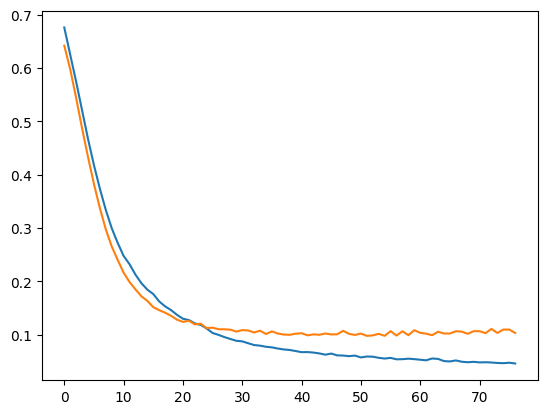

In [40]:
plt.plot(model_loss);

In [ ]:
# Model is still overfitting so we will apply Dropout

## Dropout

In [41]:
from tensorflow.keras.layers import Dropout

In [42]:
model = Sequential()
model.add(Dense(30,activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(15,activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(1,activation='sigmoid'))
model.compile(loss='binary_crossentropy',optimizer='adam')

In [43]:
model.fit(X_train,y_train,epochs=600,validation_data=(X_test,y_test),callbacks=[early_stop])

Epoch 1/600
14/14 [==============================] - 1s 8ms/step - loss: 0.7154 - val_loss: 0.6779
Epoch 2/600
14/14 [==============================] - 0s 2ms/step - loss: 0.6827 - val_loss: 0.6590
Epoch 3/600
14/14 [==============================] - 0s 2ms/step - loss: 0.6514 - val_loss: 0.6360
Epoch 4/600
14/14 [==============================] - 0s 2ms/step - loss: 0.6312 - val_loss: 0.5995
Epoch 5/600
14/14 [==============================] - 0s 2ms/step - loss: 0.6002 - val_loss: 0.5730
Epoch 6/600
14/14 [==============================] - 0s 2ms/step - loss: 0.5821 - val_loss: 0.5455
Epoch 7/600
14/14 [==============================] - 0s 2ms/step - loss: 0.5647 - val_loss: 0.5151
Epoch 8/600
14/14 [==============================] - 0s 2ms/step - loss: 0.5399 - val_loss: 0.4869
Epoch 9/600
14/14 [==============================] - 0s 2ms/step - loss: 0.5070 - val_loss: 0.4624
Epoch 10/600
14/14 [==============================] - 0s 2ms/step - loss: 0.5184 - val_loss: 0.4391
Epoch 11/

14/14 [==============================] - 0s 2ms/step - loss: 0.1179 - val_loss: 0.0947
Epoch 84/600
14/14 [==============================] - 0s 2ms/step - loss: 0.0985 - val_loss: 0.0915
Epoch 85/600
14/14 [==============================] - 0s 2ms/step - loss: 0.0956 - val_loss: 0.0958
Epoch 86/600
14/14 [==============================] - 0s 2ms/step - loss: 0.0989 - val_loss: 0.1068
Epoch 87/600
14/14 [==============================] - 0s 2ms/step - loss: 0.1077 - val_loss: 0.1017
Epoch 88/600
14/14 [==============================] - 0s 2ms/step - loss: 0.0918 - val_loss: 0.0975
Epoch 89/600
14/14 [==============================] - 0s 2ms/step - loss: 0.1194 - val_loss: 0.0927
Epoch 90/600
14/14 [==============================] - 0s 2ms/step - loss: 0.0932 - val_loss: 0.1116
Epoch 91/600
14/14 [==============================] - 0s 2ms/step - loss: 0.0948 - val_loss: 0.1016
Epoch 92/600
14/14 [==============================] - 0s 2ms/step - loss: 0.0937 - val_loss: 0.0894
Epoch 93/600


In [44]:
model_loss = pd.DataFrame(model.history.history)

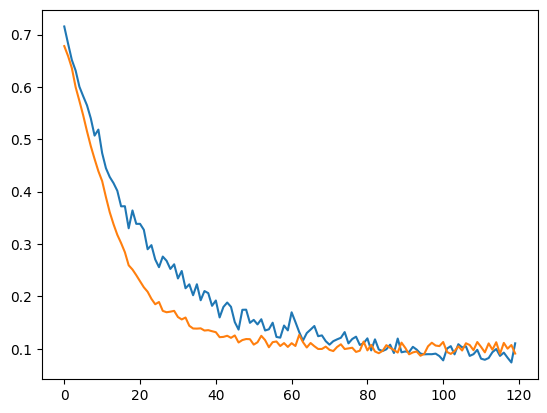

In [45]:
plt.plot(model_loss);

In [48]:
#pred = model.predict_classes(X_test)
pred =  (model.predict(X_test) > 0.5).astype("int32")

5/5 [==============================] - 0s 500us/step


# Model Evaluation

In [49]:
from sklearn.metrics import confusion_matrix,classification_report

In [50]:
confusion_matrix(y_test,pred)

array([[53,  2],
       [ 2, 86]], dtype=int64)

In [52]:
print(classification_report(y_test,pred))

              precision    recall  f1-score   support

           0       0.96      0.96      0.96        55
           1       0.98      0.98      0.98        88

    accuracy                           0.97       143
   macro avg       0.97      0.97      0.97       143
weighted avg       0.97      0.97      0.97       143

